
### 1- l’alignement optimal avec sub=-1, Id=2 et GAP=-2
la fonction Align() elle prends en parametre deux sequences pour calculer l'lignement optimale de ses sequences , en premier la matrice de l'alignement est contsruite avec les parametres donnés (sub=-1, Id=2 et GAP=-2),
ensuite en allant de la derniere case de la matrice on construit l'alignement optimale des deux sequences .
et a la fin ya une boucle pour parcourir et comparerechaque sequences avec le reste des sequences 

In [3]:
import numpy as np 
def Align(s1,s2,Id,sub,GAP):
    mat=np.zeros((len(s2)+1,len(s1)+1))
    x=np.zeros(3)
    for i in range(len(s1)+1):
        mat[0,i]=int(GAP*i)
    for i in range(len(s2)+1):
        mat[i,0]=int(GAP*i)
    for i in range(1,len(s2)+1):
        for j in range (1,len(s1)+1):
            x[0]=mat[i-1,j]+GAP
            x[1]=mat[i,j-1]+GAP
            if(s2[i-1]==s1[j-1]):
                x[2]=mat[i-1,j-1]+Id
            elif(s2[i-1]!='-' and s1[j-1]!='-'):
                x[2]=mat[i-1,j-1]+sub
            else:
                x[2]=mat[i-1,j-1]+GAP 
            mat[i,j]=int(np.max(x))

    seq1=s1[len(s1)-1]
    seq2=s2[len(s2)-1]
    x=np.zeros(3)
    i=len(s1)
    j=len(s2)
    while(i!=1 or j!=1):
        x[0]=mat[j-1,i]
        x[1]=mat[j,i-1]
        x[2]=mat[j-1,i-1]
        m=np.max(x)
        if(m==mat[j-1,i]):
            seq1+=s2[j-2]
            seq2+='-'
            j=j-1
        elif(m==mat[j,i-1]):
            seq1+='-'
            seq2+=s1[i-2]
            i=i-1
        else :
            seq1+=s1[i-2]
            seq2+=s2[j-2]
            j=j-1
            i=i-1
    seq1="".join(reversed(seq1))
    seq2="".join(reversed(seq2))
            
    return seq1,seq2

S1='ACCCGATGACCGGGCCTTGTAAACT'
S2='ACGCTACCTGTCGTATTGTAAT'
S3='ACGATGACAGGGCTTGTAACT' 
S4='TTCATGACCGGCTTATACTTAT'
S5='TTCGCTACCTGATCGTACGGTATAT'
Id=2
sub=-1
GAP=-2
Seq=[S1,S2,S3,S4,S5]
for i in range(len(Seq)):
    j=i+1
    while(j<len(Seq)):
        seq1,seq2=Align(Seq[i],Seq[j],Id,sub,GAP)
        print('Alignement optimal entre Seq',i+1,'et Seq',j+1,'est :')
        print(seq1)
        print(seq2)
        print("________________________________________________________________________________________________")
        j+=1

Alignement optimal entre Seq 1 et Seq 2 est :
ACG-CG---ACCT-GGCCTATTGTAA--T
AC-CCTATGACC-GGTCGT-T-GTAAACT
________________________________________________________________________________________________
Alignement optimal entre Seq 1 et Seq 3 est :
AC--GATGACCGGGC-T-TGTAA-CT
ACCCGATGACAGGGCC-TTGTAAACT
________________________________________________________________________________________________
Alignement optimal entre Seq 1 et Seq 4 est :
AT-C--ATGACCGG-C-T-TGTA--CTTAT
T-CCCGATGACCGGGCC-TTATAAAC---T
________________________________________________________________________________________________
Alignement optimal entre Seq 1 et Seq 5 est :
AT-CGCGACCTGAT-CGGGCCG-TGT--A-T
T-CC-CTA--TGA-CCGTACG-TTATAAACT
________________________________________________________________________________________________
Alignement optimal entre Seq 2 et Seq 3 est :
ACGCTGACC-GGTC-T--T-GTAACT
ACGAT-ACAT-GGCG-TATTGTAA-T
________________________________________________________________________________________

### 2-Arbe phylogenique avec UPGMA
dans cette etape  j'ai contruit une matrice de distances en calculant les mismatch(diference) entre chaque sequences et le reste , ensuite en utilisant e "dendogram" en prenant la matrice de distance en parametre  il contruit l'arbre phylognique ( clustering) 

[0, 11, 12, 15, 15] 

[11, 0, 9, 9, 14] 

[12, 9, 0, 8, 13] 

[15, 9, 8, 0, 7] 

[15, 14, 13, 7, 0] 



C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


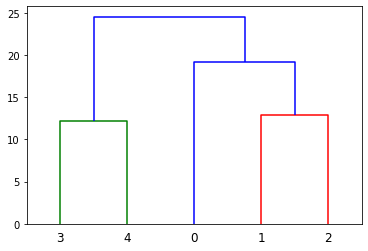

In [16]:
matrix =[["A","C","C","C","G","A","T","G","A","C","C","G","G","G","C","C","T","T","G","T","A","A","A","C","T"],
         ["A","C","G","C","T","A","C","C","T","G","T","C","G","T","A","T","T","G","T","A","A","T","-","-","-"],
         ["A","C","G","A","T","G","A","C","A","G","G","G","C","T","T","G","T","A","A","C","T","-","-","-","-"],
         ["T","T","C","A","T","G","A","C","C","G","G","C","T","T","A","T","A","C","T","T","A","T","-","-","-"],
         ["T","T","C","G","C","T","A","C","C","T","G","A","T","C","G","T","A","C","G","G","T","A","T","A","T"]]

distance = [[0 for x in range(5)] for x in range(5)]

x=1
for x in range(5):
    for y in range(x+1,5):
        mismatch=0
        for z in range(16):
            if(matrix[x][z]!=matrix[y][z]):
                mismatch+=1
        distance[x][y]=mismatch
        distance[y][x]=mismatch

for i in distance:
    print(i ,"\n")


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(distance, method = 'ward'))

### 3-Alignement globale avec algorithme claustal
#### Seq1='-ACCCGATGACCGGGCCTTGTAAACT------' 
#### Seq2='-ACGC---TACCTGT-CG----TATTGTAAT-'
#### Seq3='---ACGATGACAGGGCTTGTAA--CT------'
#### Seq4='TTCAT---GACCGGCTTA----TACTTAT---' 
#### Seq5='TTCGC---TACCTGATCG----TACGGTATAT'

### 4-Arbe phylogenique avec UPGMA

[0, 20, 10, 19, 23] 

[20, 0, 25, 16, 9] 

[10, 25, 0, 20, 27] 

[19, 16, 20, 0, 14] 

[23, 9, 27, 14, 0] 



C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


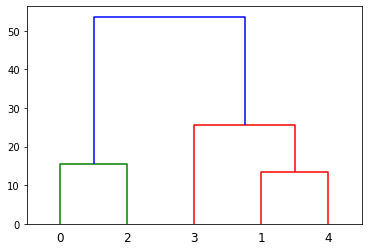

In [17]:
matrix = [["-","A","C","C","C","G","A","T","G","A","C","C","G","G","G","C","C","T","T","G","T","A","A","A","C","T","-","-","-","-","-","-"],
          ["-","A","C","G","C","-","-","-","T","A","C","C","T","G","T","-","C","G","-","-","-","-","T","A","T","T","G","T","A","A","T","-"], 
          ["-","-","-","A","C","G","A","T","G","A","C","A","G","G","G","C","T","T","G","T","A","A","-","-","C","T","-","-","-","-","-","-"], 
          ["T","T","C","A","T","-","-","-","G","A","C","C","G","G","C","T","T","A","-","-","-","-","T","A","C","T","T","A","T","-","-","-"], 
          ["T","T","C","G","C","-","-","-","T","A","C","C","T","G","A","T","C","G","-","-","-","-","T","A","C","G","G","T","A","T","A","T"]]

distance = [[0 for x in range(5)] for x in range(5)]

for x in range(5):
    for y in range(x+1,5):
        mismatch=0
        for z in range(32):
            if(matrix[x][z]!=matrix[y][z]):
                mismatch+=1
        distance[x][y]=mismatch
        distance[y][x]=mismatch

for i in distance:
    print(i ,"\n")


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(distance, method = 'ward'))